Imports pyulog package. If this does not work, close Jupyter and run the following commands in the terminal 

In [8]:
import math
import pyulog
import numpy as np
from numpy.fft import fft as fft, fftshift as fftshift, fftfreq as fftfreq 

In [35]:
# for logs created by gazebo (simulation)
log_path = '/home/lucas/src/px4/Firmware/build/px4_sitl_default/tmp/rootfs/log'
log_date = '2019-08-14'
log_time = '13_14_23'
log_file = f'{log_path}/{log_date}/{log_time}.ulg'

# for Alessandro's logs
log_path = '/home/lucas/Documents/Log_Analysis/Vibrations/Logs'
log_index = '3'
log_date = '2018-11-15'
log_time = '15-57-38'
log_file = f'{log_path}/log_{log_index}_{log_date}-{log_time}.ulg'

print(log_file)

/home/lucas/Documents/Log_Analysis/Vibrations/Logs/log_3_2018-11-15-15-57-38.ulg


In [75]:
ulog = pyulog.ULog(log_file) # creates a ULog object 
datalist = ulog.data_list # is a list of Data objects, which contain the final topic data for a single topic and instance
for elem in datalist: # datalist has interesting attributes
    name = elem.name # is a string
    print('Topic name : ' + name) # displays all the names
    if(elem.name == 'sensor_combined'):
        value = elem.field_data # is a list of FieldData objects
        timestamp_idx = elem.timestamp_idx # is an int (dont)
        data = elem.data # is a dictionnary
    
        print(['Timestamp_idx : ', timestamp_idx])
    
        print(' Those are the FieldData objects :') # all existing datafields
        for element in value:
            print([' Value name : ' + element.field_name, 'Value type : ' + element.type_str])

Topic name : vehicle_command
Topic name : vehicle_attitude_setpoint
Topic name : sensor_baro
Topic name : ekf2_timestamps
Topic name : realsense_avoidance_setpoint_input
Topic name : wind_estimate
Topic name : vehicle_status_flags
Topic name : vehicle_status
Topic name : vehicle_rates_setpoint
Topic name : vehicle_local_position_setpoint
Topic name : vehicle_local_position
Topic name : vehicle_land_detected
Topic name : vehicle_gps_position
Topic name : vehicle_global_position
Topic name : vehicle_attitude
Topic name : telemetry_status
Topic name : system_power
Topic name : sensor_preflight
Topic name : sensor_combined
['Timestamp_idx : ', 0]
 Those are the FieldData objects :
[' Value name : timestamp', 'Value type : uint64_t']
[' Value name : gyro_rad[0]', 'Value type : float']
[' Value name : gyro_rad[1]', 'Value type : float']
[' Value name : gyro_rad[2]', 'Value type : float']
[' Value name : gyro_integral_dt', 'Value type : uint32_t']
[' Value name : accelerometer_timestamp_relat

In [77]:
time = data['timestamp']
values = data['gyro_rad[0]']
for index in range(len(time)):
    print([time[index],values[index]])

[33506974, 0.010418443]
[33534976, 0.0095055355]
[33538974, 0.015675392]
[33542974, 0.014926231]
[33607774, 0.017335158]
[33611774, 0.0078820065]
[33615776, 0.0010201468]
[33619774, 0.0008582159]
[33623774, 0.00462483]
[33627774, 0.0036040538]
[33631774, 0.00550814]
[33635774, 0.018520614]
[33639774, -0.0017698952]
[33643774, 0.018638173]
[33647774, 0.004646866]
[33651774, 0.0077853953]
[33655774, -0.0031789253]
[33659774, -0.00022263381]
[33663774, 0.00096037873]
[33667774, 0.008159368]
[33671774, 0.01424986]
[33675774, 0.008666822]
[33679774, 0.008396015]
[33683774, 0.010861482]
[33687774, 0.006399205]
[33691774, 0.0018312965]
[33695774, -0.003687346]
[33699774, -0.0011947567]
[33703776, 0.011698966]
[33707774, 0.0060402113]
[33711787, 0.0082692355]
[33715774, 0.011075964]
[33719774, 0.01955074]
[33723774, -0.006057339]
[33727774, 0.008692445]
[33731774, -0.001134876]
[33736581, 0.024552371]
[33740574, -0.012377478]
[33744574, 0.01761298]
[33748574, 0.0028318719]
[33752574, 0.0081130

[40983774, 0.013129546]
[40987774, 0.082621634]
[40991774, 0.027153281]
[40995774, 0.07720677]
[40999774, 0.03829982]
[41003774, 0.04929536]
[41007774, 0.05104847]
[41011774, 0.06760774]
[41015774, 0.047836468]
[41019774, 0.0684125]
[41023774, 0.041020714]
[41027774, 0.07144027]
[41031774, 0.013901966]
[41035774, 0.10145099]
[41039802, 0.012636787]
[41043774, 0.09556772]
[41047774, 0.0034555409]
[41051777, 0.06692301]
[41055774, 0.046715584]
[41059774, 0.018273193]
[41064575, 0.07979674]
[41068576, 0.008229798]
[41072574, 0.032861337]
[41076574, 0.03557852]
[41080574, 0.053494405]
[41084576, 0.0063962527]
[41088574, 0.038895905]
[41092574, 0.015674831]
[41096574, 0.058402106]
[41100574, -0.038888816]
[41104574, 0.057164155]
[41108574, 0.005938779]
[41112574, 0.010622559]
[41116574, 0.043727037]
[41120574, -0.014967265]
[41124574, 0.017244704]
[41128574, 0.011766527]
[41132574, 0.013413578]
[41136574, -0.012410276]
[41140574, 0.048947547]
[41144574, -0.028752396]
[41148574, 0.07065111]


[52176577, -7.137571e-05]
[52180574, 0.015692562]
[52184574, 0.039352797]
[52188574, -0.02373618]
[52192574, 0.043213293]
[52196574, -0.0295304]
[52200574, 0.027901515]
[52204574, -0.031621408]
[52208574, -0.02950585]
[52212583, 0.017532522]
[52216574, -0.0434045]
[52220574, 0.019633055]
[52224574, -0.03825189]
[52228574, 0.0088741155]
[52232574, -0.03785135]
[52236574, -0.01890264]
[52240574, -0.013766306]
[52244574, -0.026342714]
[52248574, -7.6413155e-05]
[52252574, -0.05306538]
[52256574, 0.0129471095]
[52260574, -0.043724023]
[52264574, 0.00027127482]
[52268575, -0.04570891]
[52272574, -0.024243083]
[52276574, -0.02413239]
[52280574, -0.06168649]
[52284574, 0.003550867]
[52288574, -0.06899614]
[52293374, -0.037548862]
[52297379, -0.014097145]
[52301374, -0.068383366]
[52305381, -0.015947917]
[52309374, -0.06834566]
[52313374, -0.04270348]
[52317374, -0.045355257]
[52321374, -0.055584956]
[52325374, -0.040200762]
[52329374, -0.054277502]
[52333374, -0.054450758]
[52337374, -0.04339

[63714195, -0.07030428]
[63718196, -0.101202056]
[63722191, -0.028669914]
[63726193, -0.083663076]
[63730212, -0.10112009]
[63734192, -0.03199807]
[63738190, -0.13256732]
[63742190, -0.036017742]
[63746200, -0.09567986]
[63750190, -0.07170193]
[63754212, -0.08199723]
[63758190, -0.066337906]
[63762190, -0.095064096]
[63766196, -0.071547106]
[63770190, -0.11478274]
[63774191, -0.037563182]
[63778191, -0.108294204]
[63782199, -0.022983829]
[63786194, -0.14306983]
[63790191, -0.010353174]
[63794196, -0.135215]
[63798190, 0.0017154922]
[63802190, -0.12988618]
[63806198, -0.034653243]
[63810190, -0.08510417]
[63814202, -0.101073466]
[63818194, -0.053719763]
[63822194, -0.035058655]
[63826201, -0.106161796]
[63830200, -0.057111643]
[63834193, -0.0058038244]
[63838194, -0.12261476]
[63842194, 0.0117250215]
[63846200, -0.09500559]
[63850194, -0.059842594]
[63854193, -0.037678674]
[63858974, -0.023509208]
[63862974, -0.12345898]
[63866974, 0.03790478]
[63870976, -0.08866789]
[63874974, -0.02787

[74668574, 0.031509314]
[74672574, -0.030721966]
[74676574, 0.0241009]
[74680574, -0.003639174]
[74684574, 0.033830877]
[74688574, -0.014296131]
[74692574, 0.056221943]
[74696574, -0.020957185]
[74700574, 0.031203838]
[74704574, 0.0076690414]
[74708574, 0.010112665]
[74712574, -0.016636388]
[74716574, 0.10983795]
[74720574, -0.116552934]
[74724574, 0.16430578]
[74728582, -0.07297304]
[74732574, 0.09046726]
[74736574, 0.0015847539]
[74740574, 0.081746645]
[74744574, -0.0145226205]
[74748574, 0.11033007]
[74752587, -0.036797985]
[74756574, 0.121979]
[74760574, 0.029806336]
[74764574, -0.022138974]
[74768574, 0.07800012]
[74772574, 0.0154540865]
[74776574, 0.018873831]
[74780574, 0.067084]
[74784574, -0.0049157846]
[74788574, 0.06840561]
[74792574, 0.013079599]
[74796574, 0.031245187]
[74800574, 0.035969876]
[74804574, 0.03655807]
[74809374, -0.020866329]
[74813374, 0.0351272]
[74817375, -0.0003569026]
[74821374, 0.03646285]
[74825374, -0.022531554]
[74829374, 0.030298967]
[74833374, -0.0

[84654198, -0.031536326]
[84658198, -0.012418064]
[84662190, -0.03169199]
[84666196, -0.01138058]
[84670191, -0.01698196]
[84674978, -0.015882354]
[84678974, -0.026260527]
[84682974, -0.005087759]
[84686983, -0.010388263]
[84690974, -0.01109801]
[84694974, -0.024327047]
[84698976, -0.011510438]
[84702978, -0.011788304]
[84706974, -0.0341508]
[84711009, -0.017181337]
[84714974, -0.0144581385]
[84718974, -0.034650378]
[84722974, -0.026664404]
[84726974, -0.014641042]
[84730977, -0.02602177]
[84734974, -0.013572124]
[84738974, -0.042401038]
[84742974, 0.0136265755]
[84746974, -0.041928753]
[84750974, -0.023538677]
[84754974, 0.009159709]
[84758976, -0.052557092]
[84762976, 0.007918395]
[84766974, -0.0439758]
[84770974, 0.007292731]
[84774974, -0.018780872]
[84778974, -0.03100817]
[84782981, 0.013458563]
[84786976, -0.030777203]
[84790990, -0.0051192623]
[84794974, -0.012981704]
[84798974, -0.0045728064]
[84802974, -0.032543108]
[84806974, 0.008641204]
[84810974, -0.022509862]
[84814977, -

[93788574, 0.009381507]
[93792574, -0.009053786]
[93796574, 0.053277705]
[93800575, -0.029492142]
[93804574, 0.039920125]
[93808574, 0.009359041]
[93812574, 0.030013781]
[93816574, 0.014153427]
[93820575, 0.016149564]
[93824574, 0.0348291]
[93828574, -0.0047123204]
[93832574, 0.031840093]
[93836574, -0.0066864113]
[93840574, 0.04064557]
[93844574, -0.026452854]
[93848574, 0.05310924]
[93852574, 0.0018276748]
[93856574, 0.026851261]
[93860574, 0.025453802]
[93864574, 0.014797077]
[93868574, 0.047739565]
[93872574, -0.011185063]
[93876574, 0.073755816]
[93880574, -0.016065907]
[93884574, 0.053744335]
[93888574, 0.0077646095]
[93892574, 0.043467205]
[93896574, 0.043034162]
[93900574, 0.021142086]
[93904574, 0.04501741]
[93908574, 0.0051728985]
[93912574, 0.042595025]
[93916574, 0.0042972066]
[93920574, 0.065817565]
[93924574, 0.00021751765]
[93928574, 0.038845234]
[93933374, 0.042411927]
[93937374, -0.00505188]
[93941374, 0.07343756]
[93945376, -0.013757354]
[93949374, 0.07527088]
[939533

[104747774, -0.08909355]
[104751774, -0.032856517]
[104755774, -0.093792245]
[104759774, -0.028698673]
[104763774, -0.10413156]
[104767774, -0.03662656]
[104771774, -0.066098936]
[104775781, -0.09733775]
[104779775, -0.041009486]
[104783792, -0.09969636]
[104787774, -0.035698134]
[104791774, -0.10605982]
[104795774, -0.03908517]
[104799774, -0.066819176]
[104803774, -0.06898565]
[104807774, -0.027880542]
[104811774, -0.09060279]
[104815774, -0.01438243]
[104819779, -0.079292625]
[104823774, -0.0125606805]
[104827774, -0.05622716]
[104831774, -0.05413436]
[104836574, 0.0043702894]
[104840609, -0.08475165]
[104844593, -0.0025848711]
[104848574, -0.023943866]
[104852574, -0.05208055]
[104856574, 0.0051335846]
[104860574, -0.07696664]
[104864576, 0.012524839]
[104868574, -0.046447843]
[104872574, -0.020348273]
[104876574, -2.9107816e-05]
[104880574, -0.06858856]
[104884575, 0.032771237]
[104888574, -0.047733422]
[104892574, 0.0117134005]
[104896574, -0.015655959]
[104900574, -0.007572864]


[117079774, -0.00091632915]
[117083774, -0.021193285]
[117087774, 0.025457129]
[117091774, -0.095332876]
[117095774, 0.061396778]
[117099774, -0.0618569]
[117103774, 0.004725129]
[117107774, 0.010891754]
[117111774, -0.070602424]
[117115774, -0.013967673]
[117119774, 0.011123847]
[117123774, -0.09197451]
[117127791, 0.04455567]
[117131774, -0.087956816]
[117135774, 0.008897129]
[117139774, -0.046669938]
[117143774, -0.08255898]
[117147774, -0.020929914]
[117151774, -0.06138709]
[117155774, -0.070377655]
[117159774, 0.009402473]
[117163774, -0.09743759]
[117167774, -0.0061841775]
[117171774, -0.12394351]
[117175774, -0.009505062]
[117179774, -0.12283169]
[117183774, 0.034290414]
[117187774, -0.16803674]
[117191774, 0.023306673]
[117195774, -0.091865726]
[117200574, -0.09118355]
[117204574, -0.035014443]
[117208574, -0.027851844]
[117212574, -0.14862633]
[117216574, -0.005680771]
[117220574, -0.1147657]
[117224574, -0.09533094]
[117228574, -0.050999667]
[117232574, -0.101541504]
[1172365

[129114195, 0.019377893]
[129118194, -0.0980195]
[129122197, -0.0043492517]
[129126190, -0.08718365]
[129130191, -0.027107222]
[129134192, -0.031524662]
[129138193, 0.005078132]
[129142191, -0.032140143]
[129146190, 0.08595451]
[129150191, -0.04961218]
[129154190, 0.07880779]
[129158205, -0.029012566]
[129162198, 0.06404644]
[129166193, -0.025435595]
[129170190, 0.094489925]
[129174190, -0.024011523]
[129178204, 0.064144276]
[129182198, 0.034165498]
[129186191, 0.015401658]
[129190190, 0.061555002]
[129194190, 0.013071129]
[129198193, 0.05296659]
[129202190, -0.002409175]
[129206192, 0.012902641]
[129210190, 0.039665267]
[129214208, -0.02845606]
[129218196, 0.027986431]
[129222194, -0.02013337]
[129226194, 0.028135952]
[129230207, -0.013169397]
[129234194, -0.021750256]
[129238202, 0.03145305]
[129242198, -0.058585044]
[129246194, 0.016914906]
[129250205, -0.026380816]
[129254190, -0.012105813]
[129258194, 0.007874373]
[129262974, -0.03876884]
[129266974, 0.0033980801]
[129270974, -0.0

[140508574, -0.46720397]
[140512574, -0.49112648]
[140516574, -0.456496]
[140520574, -0.49502546]
[140524574, -0.486576]
[140528574, -0.48707914]
[140532574, -0.51411664]
[140536574, -0.46770108]
[140540574, -0.53356034]
[140544574, -0.46930397]
[140548574, -0.5436399]
[140552574, -0.47743112]
[140556574, -0.50848377]
[140560574, -0.52713734]
[140565374, -0.49754268]
[140569374, -0.54736257]
[140573374, -0.46153066]
[140577374, -0.5284856]
[140581374, -0.4954683]
[140585374, -0.46648178]
[140589374, -0.49242392]
[140593374, -0.49219462]
[140597374, -0.4577018]
[140601374, -0.44607455]
[140605374, -0.4843208]
[140609374, -0.45048484]
[140613374, -0.39907485]
[140617374, -0.40655833]
[140621374, -0.40947145]
[140625374, -0.41922617]
[140629374, -0.29834437]
[140633374, -0.41411152]
[140637374, -0.35283756]
[140641374, -0.29784548]
[140645374, -0.29032803]
[140649374, -0.36598122]
[140653374, -0.30707508]
[140657375, -0.19882423]
[140661376, -0.30314556]
[140665374, -0.22447182]
[14066937

[152193374, -0.25156116]
[152197374, -0.20088015]
[152201374, -0.26267877]
[152205374, -0.17941855]
[152209374, -0.23512737]
[152213374, -0.14542653]
[152217374, -0.19657643]
[152221374, -0.11529188]
[152225376, -0.17873359]
[152229374, -0.09402516]
[152233374, -0.0871674]
[152237392, -0.13025327]
[152241374, -0.012850629]
[152245388, -0.081062175]
[152249374, -0.037654918]
[152253374, -0.03300776]
[152257374, 0.016831728]
[152261374, -0.040367663]
[152265376, 0.080330074]
[152269374, 0.015834313]
[152273374, 0.022086924]
[152277374, 0.09990143]
[152281374, 0.04259705]
[152285376, 0.15054853]
[152289374, 0.10731747]
[152293374, 0.13580386]
[152297374, 0.12237379]
[152301388, 0.21367685]
[152305374, 0.18396077]
[152309374, 0.23388153]
[152313374, 0.23529607]
[152318190, 0.22672492]
[152322190, 0.26785022]
[152326193, 0.2933755]
[152330198, 0.34014186]
[152334191, 0.29961237]
[152338190, 0.34838367]
[152342191, 0.3608594]
[152346190, 0.37018898]
[152350198, 0.40755183]
[152354196, 0.4109

[163340574, -0.04669956]
[163344594, 0.027217751]
[163348574, -0.032819584]
[163352574, 0.019001717]
[163356574, -0.013017631]
[163360574, 0.0039651706]
[163364574, -0.030068165]
[163368574, 0.0055572637]
[163372574, -0.015782379]
[163376574, 0.02589887]
[163380574, -0.036533635]
[163384574, 0.012771263]
[163388574, -0.03909441]
[163392574, 0.028487336]
[163397394, -0.05006801]
[163401374, 0.051513195]
[163405374, -0.039466843]
[163409374, -0.014142397]
[163413375, 0.0017741339]
[163417374, -0.003881855]
[163421374, 0.0033911576]
[163425374, -0.006307608]
[163429374, 0.0054271785]
[163433374, -0.016525574]
[163437374, -0.036565773]
[163441377, 0.026205486]
[163445374, 0.0055467207]
[163449374, -0.006267266]
[163453374, -0.013450528]
[163457374, 0.00590087]
[163461374, -0.03966199]
[163465374, 0.03275639]
[163469384, -0.042381767]
[163473374, 0.035080325]
[163477374, -0.030737165]
[163481390, -0.015328444]
[163485376, 0.03881989]
[163489374, -0.028281754]
[163493376, 0.020575197]
[16349

In [79]:
ulog = pyulog.ULog(log_file,['vehicle_local_position','sensor_combined','actuator_outputs']) # creates a ULog object 
datalist = ulog.data_list # is a list of Data objects, which contain the final topic data for a single topic and instance
data_vlp = datalist[0].data # is a dictionnary
data_sc = datalist[1].data
data_ao = datalist[3].data # the first one is (AUX)
time_vlp = data_vlp['timestamp']/1e6 # convert it from us to s
time_sc = data_sc['timestamp']/1e6
time_ao = data_ao['timestamp']/1e6 
acc_x = data_vlp['ax']
acc_y = data_vlp['ay']
acc_z = data_vlp['az']
roll = data_sc['gyro_rad[0]']
pitch = data_sc['gyro_rad[1]']
yaw = data_sc['gyro_rad[2]']
gacc_x=data_sc['accelerometer_m_s2[0]']
gacc_y=data_sc['accelerometer_m_s2[1]']
gacc_z=data_sc['accelerometer_m_s2[2]']
rpm1 = data_ao['output[0]']
rpm2 = data_ao['output[1]']
rpm3 = data_ao['output[2]']
rpm4 = data_ao['output[3]']
rpm5 = data_ao['output[4]']
rpm6 = data_ao['output[5]']

<IPython.core.display.Javascript object>


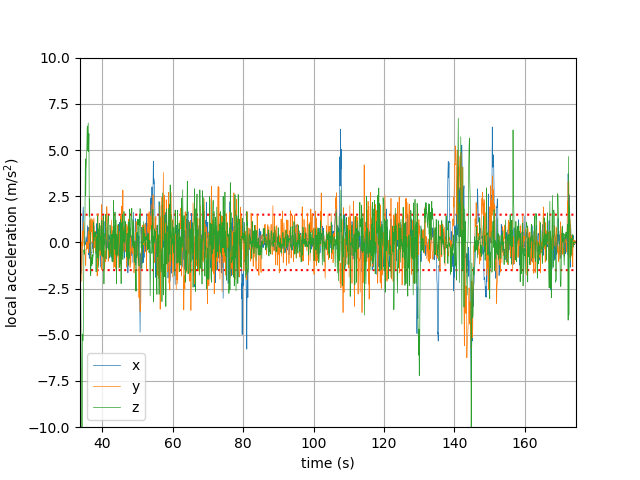

In [71]:
from matplotlib import pyplot as plt
%matplotlib notebook
threshold = 1.5 # m/s^2
threshold_list_vlp = [threshold for timestamp in time_vlp]

# Figure 1 : Acceleration time plot
plt.figure()
plt.plot(time_vlp,threshold_list,'r:')
plt.plot(time_vlp,[-elem for elem in threshold_list_vlp],'r:')
plt.plot(time_vlp,acc_x,label='x',linewidth=0.5)
plt.plot(time_vlp,acc_y,label='y',linewidth=0.5)
plt.plot(time_vlp,acc_z,label='z',linewidth=0.5)
plt.xlabel('time (s)')
plt.ylabel('local acceleration (m/s$^2$)')
plt.grid()
plt.legend()
plt.axis([time_acc[0], time_acc[-1], -10, 10])
# plt.axis([0, time_acc[-1], -threshold-1, threshold+1])
plt.show()

<IPython.core.display.Javascript object>


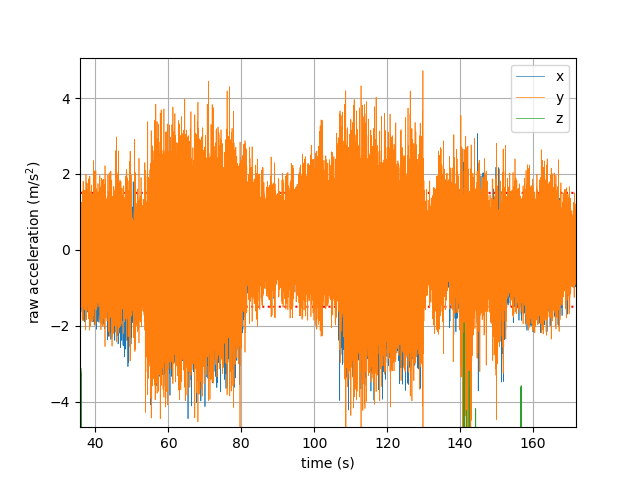

In [74]:
threshold_list_sc = [threshold for timestamp in time_sc]
plt.figure()
plt.plot(time_sc,threshold_list_sc,'r:')
plt.plot(time_sc,[-elem for elem in threshold_list_sc],'r:')
plt.plot(time_sc,gacc_x,label='x',linewidth=0.5)
plt.plot(time_sc,gacc_y,label='y',linewidth=0.5)
plt.plot(time_sc,gacc_z,label='z',linewidth=0.5)
plt.xlabel('time (s)')
plt.ylabel('raw acceleration (m/s$^2$)')
plt.grid()
plt.legend()
plt.axis([time_sc[0], time_sc[-1], -30, 20])
# plt.axis([0, time_acc[-1], -threshold-1, threshold+1])
plt.show()

<IPython.core.display.Javascript object>


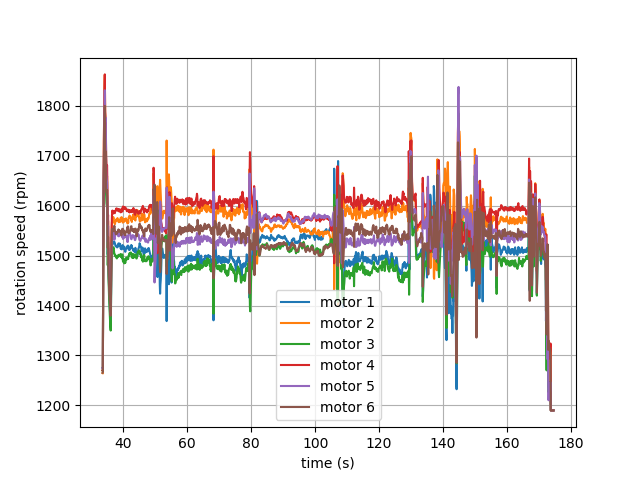

In [57]:
plt.figure()
plt.plot(time_rpm,rpm1,label="motor 1")
plt.plot(time_rpm,rpm2,label="motor 2")
plt.plot(time_rpm,rpm3,label="motor 3")
plt.plot(time_rpm,rpm4,label="motor 4")
plt.plot(time_rpm,rpm5,label="motor 5")
plt.plot(time_rpm,rpm6,label="motor 6")
plt.xlabel('time (s)')
plt.ylabel('rotation speed (rpm)')
plt.grid()
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


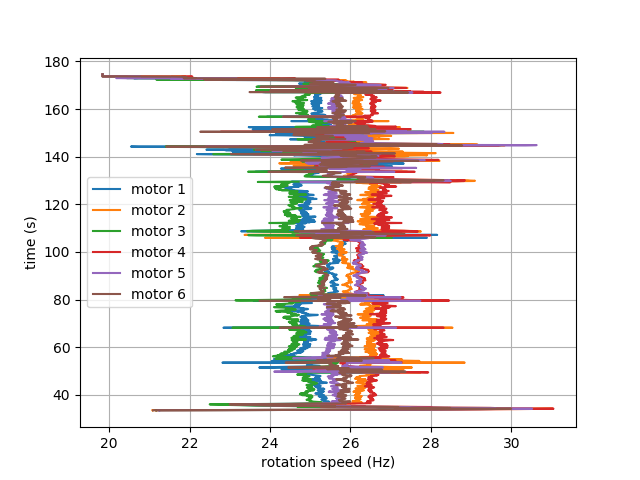

In [58]:
pfreq1 = rpm1/60 # convert to Hz
pfreq2 = rpm2/60
pfreq3 = rpm3/60
pfreq4 = rpm4/60
pfreq5 = rpm5/60
pfreq6 = rpm6/60

plt.figure()
plt.plot(pfreq1,time_rpm,label="motor 1")
plt.plot(pfreq2,time_rpm,label="motor 2")
plt.plot(pfreq3,time_rpm,label="motor 3")
plt.plot(pfreq4,time_rpm,label="motor 4")
plt.plot(pfreq5,time_rpm,label="motor 5")
plt.plot(pfreq6,time_rpm,label="motor 6")
plt.xlabel('rotation speed (Hz)')
plt.ylabel('time (s)')
plt.grid()
plt.legend()
plt.show()

In [63]:
# computing the frequency range of the accelerations
N = len(acc_z) # number of data points
dt = np.mean(np.diff(time_vlp)) # average sampling time in
freq = fftfreq(N,dt)*360/(2*math.pi) # Hz


# computing the amplitudes of the accelerations
acc_x_complex_spectrum = fft(acc_x, N)
acc_x_complex_spectrum = acc_x_complex_spectrum
acc_x_amplitudes = np.abs(acc_x_complex_spectrum)
acc_x_phase = np.angle(acc_x_complex_spectrum)

acc_y_complex_spectrum = fft(acc_y, N)
acc_y_complex_spectrum = acc_y_complex_spectrum
acc_y_amplitudes = np.abs(acc_y_complex_spectrum)
acc_y_phase = np.angle(acc_y_complex_spectrum)

acc_z_complex_spectrum = fft(acc_z, N)
acc_z_complex_spectrum = acc_z_complex_spectrum
acc_z_amplitudes = np.abs(acc_z_complex_spectrum)
acc_z_phase = np.angle(acc_z_complex_spectrum)

Axpos = acc_x_amplitudes[:N//2]
Axneg = np.flip(acc_x_amplitudes[N//2+1:])
Ax = Axpos + Axneg

Aypos = acc_y_amplitudes[:N//2]
Ayneg = np.flip(acc_y_amplitudes[N//2+1:])
Ay = Aypos + Ayneg


Azpos = acc_z_amplitudes[:N//2]
Azneg = np.flip(acc_z_amplitudes[N//2+1:])
Az = Azpos + Azneg

In [87]:
# computing the frequency range of the accelerations
N = len(acc_z) # number of data points
dt = np.mean(np.diff(time_vlp)) # average sampling time in
freq = fftfreq(N,dt)*360/(2*math.pi) # Hz


# computing the amplitudes of the accelerations
roll_complex_spectrum = fft(roll, N)
roll_complex_spectrum = roll_complex_spectrum
roll_amplitudes = np.abs(roll_complex_spectrum)

pitch_complex_spectrum = fft(pitch, N)
pitch_complex_spectrum = pitch_complex_spectrum
pitch_amplitudes = np.abs(pitch_complex_spectrum)

yaw_complex_spectrum = fft(yaw, N)
yaw_complex_spectrum = yaw_complex_spectrum
yaw_amplitudes = np.abs(yaw_complex_spectrum)

Rpos = roll_amplitudes[:N//2]
Rneg = np.flip(roll_amplitudes[N//2+1:])
R = Rpos + Rneg

Ppos = pitch_amplitudes[:N//2]
Pneg = np.flip(pitch_amplitudes[N//2+1:])
P = Ppos + Pneg


Ypos = yaw_amplitudes[:N//2]
Yneg = np.flip(yaw_amplitudes[N//2+1:])
Y = Ypos + Yneg

<IPython.core.display.Javascript object>


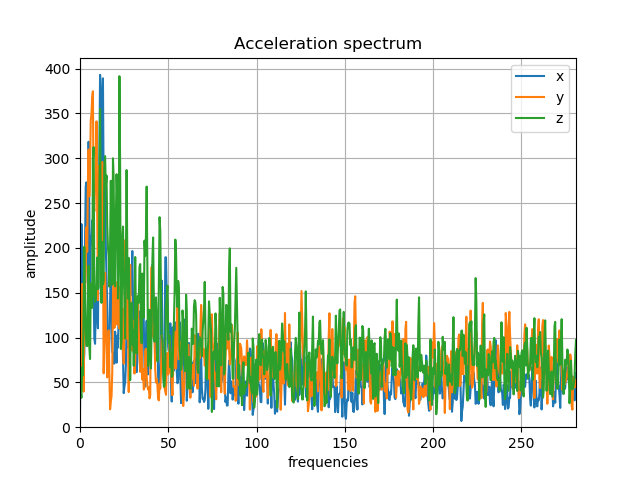

In [88]:
#define RPMMAX 1900 ~30Hz
#define RPMMIN 1200 ~20Hz
# Figure 4 : frequency spectrum of the acceleration
plt.figure()
plt.plot(freq[:N//2],Ax,label='x')
plt.plot(freq[:N//2],Ay,label='y')
plt.plot(freq[:N//2],Az,label='z')
plt.xlabel('frequencies')
plt.ylabel('amplitude')
plt.axis([0, freq[N//2-1], 0, None])
plt.title('Acceleration spectrum')
plt.grid()
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


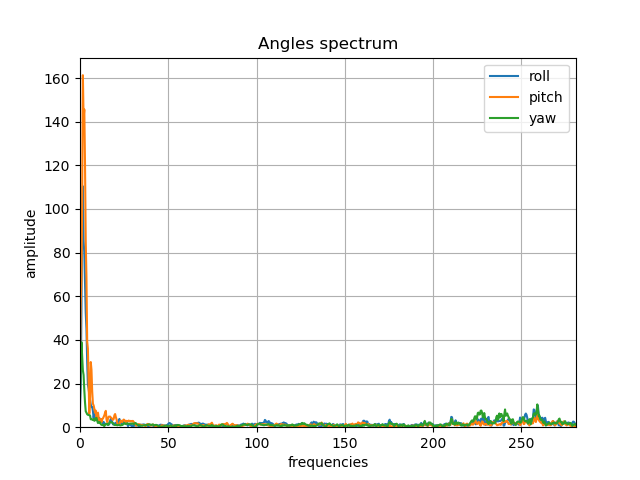

In [89]:
# Figure 5 : frequency spectrum of the angles
plt.figure()
plt.plot(freq[:N//2],R,label='roll')
plt.plot(freq[:N//2],P,label='pitch')
plt.plot(freq[:N//2],Y,label='yaw')
plt.xlabel('frequencies')
plt.ylabel('amplitude')
plt.axis([0, freq[N//2-1], 0, None])
plt.title('Angles spectrum')
plt.grid()
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


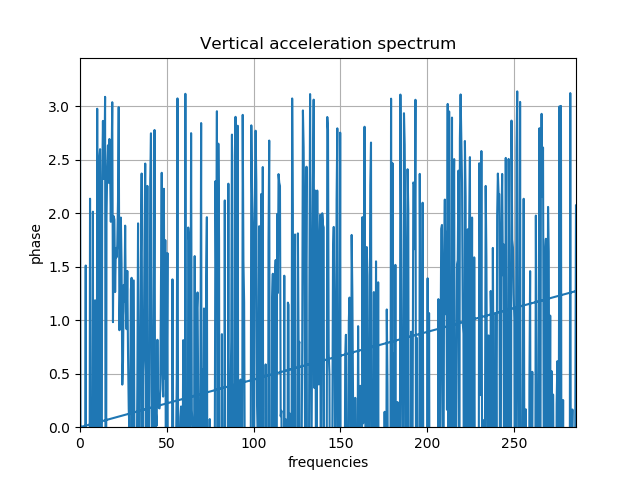

<class 'numpy.ndarray'>


In [61]:
plt.figure()
print(type(freq))
plt.plot(freq,acc_z_phase)
plt.xlabel('frequencies')
plt.ylabel('phase')
plt.title('Vertical acceleration spectrum')
plt.axis([0, freq[N//2-1], 0, None])
plt.grid()
plt.show()

In [62]:
for x in dt:
    print(x)

0.10011300000000034
0.10072900000000118
0.10476200000000091
0.09999499999999983
0.1007979999999975
0.1008110000000002
0.10399199999999809
0.10092200000000418
0.10072100000000006
0.09997399999999601
0.10491100000000131
0.10068199999999905
0.10006100000000373
0.10086299999999682
0.10466999999999871
0.1003690000000006
0.10057700000000125
0.10063800000000356
0.10096499999999509
0.10384300000000479
0.10085999999999729
0.10073799999999977
0.10405999999999693
0.10083800000000309
0.10070699999999988
0.1000230000000002
0.10079600000000255
0.1051519999999968
0.09967999999999932
0.10081500000000432
0.1007849999999948
0.10396800000000184
0.10112300000000118
0.1004739999999984
0.09999799999999937
0.10509199999999908
0.10453800000000513
0.09994899999999518
0.10082500000000039
0.10089700000000335
0.10393700000000194
0.10080399999999656
0.100718999999998
0.1040880000000044
0.10075799999999902
0.10089500000000129
0.09993000000000052
0.10075999999999397
0.10484200000000499
0.09996599999999489
0.10078700

In [ ]:
print(acc_z_complex_spectrum[N//2-1:N//2+1])
fnyquist = N//2 # spectrum at nyquist frequency must have 0 imaginary part

In [ ]:
dtmax = np.max(dt) # looking for the longest time interval between two sampletimes
print(dtmax)
print(f'the average sampling time is : {np.mean(dt)}s') # average sample time in s
# the highest achievable resolution in frequency is twice the inverse the longest dt
print(1/dtmax) # max freq in rad
print(1/dtmax*360/(2*math.pi))